In [44]:
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)

import torch
import model_utils
import Plotter
from Frame import Frame
import pickle 
import numpy as np
import Utils
import plotly.graph_objects as go
import plotly.io as pio
from plyfile import PlyData
path_to_mesh = 'D:/Documents/model_gaussian_splatting/model/mesh_for_eval'    

path_to_mesh = 'D:/Documents/model_gaussian_splatting/model/mesh'

# path_to_mesh = 'D:/Documents/model_gaussian_splatting/model/mosq'    


mov_frame = 'mov_45_frame_443'
mov = int(mov_frame.split('_')[1])
frame = int(mov_frame.split('_')[3])


# frame = 1659
image_path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov{mov}_2023_08_09_60ms/'

mov = 1

image_path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov{mov}_2023_08_09_60ms/'

# image_path = 'D:/Documents/data_for_gs/mov1_2023_08_09_60ms/'

# dict_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov113_2024_11_12_darkan/frames_model.pkl'
dict_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/frames_model_evaluation.pkl'
mov = 1
dict_path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov{mov}_2023_08_09_60ms/frames_model_seminar.pkl'



mov_frame = 'mov_45_frame_443'
mov = int(mov_frame.split('_')[1]) 
frame = int(mov_frame.split('_')[3]) 
idx_iter = 0
image_path =  f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov9_cornell/'
file_name = f'fly_model_scale_iter{idx_iter}'
interest_points_path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/points/mov{mov}'
dict_path  = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/dict/frames_model_evaluation.pkl'

dict_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov9_cornell/dict/frames_model_cornell.pkl'
# dict_path  = 'D:/Documents/data_for_gs/mov1_2023_08_09_60ms/frames_model.pkl'

# dict_path = 'D:/Documents/data_for_gs/fly_gray/dict/frames_model.pkl'

# image_path =  f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov2_2024_04_10_moquito/'

# dict_path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov2_2024_04_10_moquito/frames_model_seminar.pkl'
# frame = 200
frame = 1765
with open(dict_path, 'rb') as file:
    data_dict = pickle.load(file)



root,body,right_wing,left_wing,list_joints_pitch_update = model_utils.initilize_skeleton_and_skin(path_to_mesh,skeleton_scale=1/1000)
joint_list,skin,weights,bones = model_utils.build_skeleton(root,body,right_wing,left_wing)


frames_per_cam = [Frame(image_path,frame,cam_num,frames_dict = data_dict) for cam_num in range(4)]
camera_pixel = np.vstack([frame.camera_center_to_pixel_ray(([frame.cm[0],frame.cm[1]])) for frame in  frames_per_cam])
camera_center = np.vstack([frame.X0.T for frame in  frames_per_cam])
cm_point = Utils.triangulate_least_square(camera_center,camera_pixel)
ew_to_lab = list(data_dict[frame][1].values())[0]['ew_to_lab']
cm_point_lab = torch.tensor(ew_to_lab @ cm_point,device='cuda').float()


fig = go.Figure()
Plotter.plot_skeleton(bones,fig,{},line_dict = {'width' : 10}, name = ['neck_head','wing','neck_thorax','thorax_abdomen','right_wing','right_wing_center1','right_wing_center2','left_wing','left_wing_center1','left_wing_center1'])
Plotter.plot_skin(fig,body.ptcloud_skin.cpu(),'skin',skip_skin_points = 1,color = 'lime',size = 3)
Plotter.plot_skin(fig,right_wing.ptcloud_skin.cpu(),'skin',skip_skin_points = 1,color = 'firebrick',size = 3)
Plotter.plot_skin(fig,left_wing.ptcloud_skin.cpu(),'skin',skip_skin_points = 1,color = 'slateblue',size = 3)



# Set grid color
fig.update_layout(
    scene=dict(
        xaxis=dict(
            visible=False,
            showgrid=False,
            showticklabels=False,
            showline=False,
            zeroline=False
        ),
        yaxis=dict(
            visible=False,
            showgrid=False,
            showticklabels=False,
            showline=False,
            zeroline=False
        ),
        zaxis=dict(
            visible=False,
            showgrid=False,
            showticklabels=False,
            showline=False,
            zeroline=False
        ),
        bgcolor='white'
    )
)

fig.show()

path_to_save = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_output/model_rest.html'
fig.write_html(path_to_save)
# path_to_save = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_output/model_twist.svg'

# fig.write_image(path_to_save, format="svg")



# Plotters.scatter3d(fig,vertices_lab,'red',3,'vol',show_colorbar = False)
# fig.show()



    # image_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov30_2024_11_12_darkan/'
    # frame = 1447
    # frames_per_cam = [Frame(image_path,frame,cam_num,frames_dict = data_dict) for cam_num in range(4)]
    # camera_pixel = np.vstack([frame.camera_center_to_pixel_ray(([frame.cm[0],frame.cm[1]])) for frame in  frames_per_cam])
    # camera_center = np.vstack([frame.X0.T for frame in  frames_per_cam])
    # cm_point = camera_frame_utils.triangulate_least_square(camera_center,camera_pixel)
    

    #     model['ew_to_lab'] = list(data_dict[frame][1].values())[0]['ew_to_lab']
    #     cm_point_lab = model['ew_to_lab'] @ cm_point
    #     model['wing_body_ini_pose']['body_location_initial'] = cm_point_lab
        # model['skin'] = model['skin']

# path_to_save = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_output/model_twist.html'
# fig.write_html(path_to_save)



In [9]:
input_dir = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation'

with open(f'{input_dir}/nominal_initial_angles.pkl', 'rb') as handle:
    nominal_initial_angles = pickle.load(handle)
list(nominal_initial_angles.keys())[50:70]

['mov_132_frame_3186',
 'mov_76_frame_1012',
 'mov_76_frame_2979',
 'mov_132_frame_4213',
 'mov_76_frame_4448',
 'mov_164_frame_1499',
 'mov_132_frame_4205',
 'mov_76_frame_4373',
 'mov_132_frame_2532',
 'mov_164_frame_306',
 'mov_164_frame_2088',
 'mov_164_frame_318',
 'mov_164_frame_505',
 'mov_121_frame_2000',
 'mov_164_frame_296',
 'mov_164_frame_2097',
 'mov_164_frame_2774',
 'mov_164_frame_292',
 'mov_164_frame_1625',
 'mov_164_frame_2870']

In [2]:
nominal_initial_angles

NameError: name 'nominal_initial_angles' is not defined

In [7]:
mov_frame = 'mov_45_frame_443'
# bod = nominal_initial_angles[mov_frame]['body_angles']

bod = [ 14.425166, -38.141003,  -0.99725 ]
# bod[0] = 180
body_angles = torch.tensor(bod,device='cuda')
body_angles[2] = 0
body_angles[0] = 0 # for dof definitions = [0,-53,0]
# right_wing_angles = torch.tensor(nominal_initial_angles[mov_frame]['right_wing_angles'],device='cuda')

right_wing_angles = torch.tensor([ 65.95598  , 180-16.649067 ,  -7.7329946],device='cuda') # [-25,-70.0,-14.0]
# right_wing_angles[1] = 127
right_wing_angles_joint1 = torch.tensor(0.0).cuda()
right_wing_angles_joint2 = torch.tensor(0.0).cuda()
right_wing_twist_joint1 = torch.tensor(0.0).cuda()
right_wing_twist_joint2 = torch.tensor(0.0).cuda()



# left_wing_angles = torch.tensor(nominal_initial_angles[mov_frame]['left_wing_angles'],device='cuda')
# left_wing_angles[1] = 73-180
left_wing_angles = torch.tensor([-58.668076 , 180-22.354708 ,   5.6790805],device='cuda') # [25,-70.0,14.0]

left_wing_angles_center = torch.tensor([0,0,-0.0],device='cuda')
left_wing_angles_joint1 = torch.tensor(0.0).cuda()
left_wing_angles_joint2 = torch.tensor(0.0).cuda()
left_wing_twist_joint1 = torch.tensor(0.0).cuda()
left_wing_twist_joint2 = torch.tensor(0.0).cuda()



cm_point_lab_t = cm_point_lab 

means3D = model_utils.transform_pose(skin,weights,body_angles,list_joints_pitch_update,joint_list,bones,cm_point_lab_t,right_wing_angles,
                   left_wing_angles,right_wing_angles_joint1,left_wing_angles_joint1,
                   right_wing_twist_joint1,left_wing_twist_joint1,right_wing_angles_joint2,left_wing_angles_joint2,
                   right_wing_twist_joint2,left_wing_twist_joint2)
means3D_ew = torch.tensor(torch.tensor(ew_to_lab.T).cuda().float() @ means3D.T,device='cuda').float().T

body_ew = means3D_ew[:body.ptcloud_skin.shape[0],:]
rw_ew = means3D_ew[body.ptcloud_skin.shape[0]:body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0],:]
lw_ew = means3D_ew[body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0]:body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0] + left_wing.ptcloud_skin.shape[0],:]


body_model = means3D[:body.ptcloud_skin.shape[0],:]
rw_model = means3D[body.ptcloud_skin.shape[0]:body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0],:]
lw_model = means3D[body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0]:body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0] + left_wing.ptcloud_skin.shape[0],:]


# ax = Plotters.plot_projections(body_ew[::1,:].cpu(),frames_per_cam, color = 'green')
# ax = Plotters.plot_projections(rw_ew[::10,:].cpu(),frames_per_cam, color = 'red', ax = ax)
# ax = Plotters.plot_projections(lw_ew[::10,:].cpu(),frames_per_cam, color = 'blue', ax = ax)

# Plotters.plot_images(frames_per_cam, ax = None)

fig = go.Figure()
Plotter.plot_skeleton(bones,fig,{},line_dict = {'width' : 10}, name = ['neck_head','wing','neck_thorax','thorax_abdomen','right_wing','right_wing_center1','right_wing_center2','left_wing','left_wing_center1','left_wing_center1'])
Plotter.plot_skin(fig,body_model.cpu(),'skin',skip_skin_points = 1,color = 'limegreen',size = 3)
Plotter.plot_skin(fig,rw_model.cpu(),'skin',skip_skin_points = 1,color = 'firebrick',size = 3)
Plotter.plot_skin(fig,lw_model.cpu(),'skin',skip_skin_points = 1,color = 'slateblue',size = 3)

body_cm = torch.mean(body_model.cpu(), axis = 0).numpy()

delta_x,delta_y = 2/1000,2/1000
x=np.linspace(body_cm[0] - delta_x,body_cm[0] + delta_x, 50)
y=np.linspace(body_cm[1]- delta_y,body_cm[1] + delta_y, 50)
x,y=np.meshgrid(x,y)
z_level=body_cm[2] - 0.3/1000 #plot a z-plane at height 1
z=z_level*np.ones(x.shape)
single_color=[[0.0, 'blue'], [1.0, 'blue']]
surfacecolor = np.zeros_like(z)

# z_plane = go.Surface(
#     x=x,
#     y=y,
#     z=z,
#     surfacecolor=surfacecolor,
#     colorscale=[[0, 'blue'], [1, 'blue']],  # Flat blue color
#     showscale=False,
#     opacity=0.1
# )
# fig.add_trace(z_plane)
# Set grid color
fig.update_layout(
    scene=dict(
        xaxis=dict(
            visible=False,
            showgrid=False,
            showticklabels=False,
            showline=False,
            zeroline=False
        ),
        yaxis=dict(
            visible=False,
            showgrid=False,
            showticklabels=False,
            showline=False,
            zeroline=False
        ),
        zaxis=dict(
            visible=False,
            showgrid=False,
            showticklabels=False,
            showline=False,
            zeroline=False
        ),
        bgcolor='white'
    )
)

fig.show()

path_to_save = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_output/model_twist.html'
fig.write_html(path_to_save)
# path_to_save = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_output/model_twist.svg'
path_to_save = 'G:/My Drive/Research/gaussian_splatting/article/plots/dofs/model_wing_dof.png'

fig.write_image(path_to_save, format="png")


C:\Users\Roni\AppData\Local\Temp\ipykernel_7480\2944760189.py:38: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [61]:
body_modelpath_to_save = 'G:/My Drive/Research/gaussian_splatting/article/plots/dofs/model_wing_dof.svg'

fig.write_image(path_to_save, format="svg")

In [222]:
yaw_grid = np.hstack((0,np.arange(-20,0,5),np.arange(5.0,20,5)))
yaw_grid.dtype

dtype('float64')

In [19]:

import Plotter
import Plotters
import plotly.graph_objects as go
import plotly.io as pio
from plyfile import PlyData

pio.renderers.default='browser'

body_angles = torch.tensor([-110.0,  -30.0, 30],device='cuda')
right_wing_angles = torch.tensor([-90,-80,-0.],device='cuda')
right_wing_angles_center1 = torch.tensor([0,0,0.0],device='cuda')
right_wing_angles_center2 = torch.tensor([0,0,0.0],device='cuda')

left_wing_angles = torch.tensor([80,-90,-0.0],device='cuda')
left_wing_angles_center = torch.tensor([0,0,-1.0],device='cuda')

cm_point_lab_t = cm_point_lab + torch.tensor([0.0001,-0.0004,-0.000] ,device = 'cuda')
means3D = model_utils.transform_pose(skin,weights,body_angles,
                            list_joints_pitch_update,joint_list,bones,cm_point_lab_t,
                            right_wing_angles,left_wing_angles,right_wing_angles_center1,left_wing_angles_center,right_wing_angles_center2)

means3D = model_utils.transform_pose(points,weights,root_rotation,list_joints_pitch_update,joint_list,bones,translation,right_wing_angles,
                   left_wing_angles,right_wing_angles_joint1,left_wing_angles_joint1,
                   right_wing_twist_joint1,left_wing_twist_joint1,right_wing_angles_joint2,left_wing_angles_joint2,
                   right_wing_twist_joint2,left_wing_twist_joint2)
means3D_ew = torch.tensor(torch.tensor(ew_to_lab.T).cuda().float() @ means3D.T,device='cuda').float().T

fig = go.Figure()
idx_body = np.sum(weights.cpu().numpy()[:, :3], axis=1) == 1
idx_rw   = np.sum(weights.cpu().numpy()[:, 3:6], axis=1) == 1
idx_lw   = np.sum(weights.cpu().numpy()[:, 6:], axis=1) == 1

# Plotters.scatter3d(fig,vertices_lab,'red',3,'vol',show_colorbar = False)
# fig.show()

Plotter.plot_skeleton(bones,fig,{},{}, name = ['neck_head','neck_thorax','thorax_abdomen','right_wing','right_wing_center1','right_wing_center2','left_wing','left_wing_center1','left_wing_center1'])
Plotter.plot_skin(fig,means3D.cpu()[idx_body,:],'skin',skip_skin_points = 1,color = 'lime',size = 3)
Plotter.plot_skin(fig,means3D.cpu()[idx_rw,:],'skin',skip_skin_points = 1,color = 'pink',size = 3)
Plotter.plot_skin(fig,means3D.cpu()[idx_lw,:],'skin',skip_skin_points = 1,color = 'cyan',size = 3)
fig.show()


# path_to_save = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_output/model_twist.html'
# fig.write_html(path_to_save)


TypeError: transform_pose() missing 5 required positional arguments: 'left_wing_twist_joint1', 'right_wing_angles_joint2', 'left_wing_angles_joint2', 'right_wing_twist_joint2', and 'left_wing_twist_joint2'

In [20]:
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)

import torch
import model_utils_mos as model_utils
import Plotter
from Frame import Frame
import pickle 
import numpy as np
import Utils
import plotly.graph_objects as go
import plotly.io as pio
from plyfile import PlyData
path_to_mesh = 'D:/Documents/model_gaussian_splatting/model/mesh'    


path_to_mesh = 'D:/Documents/model_gaussian_splatting/model/mosq'    


mov_frame = 'mov_128_frame_1620'
mov = int(mov_frame.split('_')[1])
frame = int(mov_frame.split('_')[3])


frame = 1659
image_path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov{mov}_2023_08_09_60ms/'

mov = 1

image_path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov{mov}_2023_08_09_60ms/'

# image_path = 'D:/Documents/data_for_gs/mov1_2023_08_09_60ms/'

# dict_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov113_2024_11_12_darkan/frames_model.pkl'
dict_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/frames_model_evaluation.pkl'
mov = 1
dict_path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov{mov}_2023_08_09_60ms/frames_model_seminar.pkl'



mov_frame = 'mov_128_frame_1620'
mov = int(mov_frame.split('_')[1]) 
frame = int(mov_frame.split('_')[3]) 
idx_iter = 0
image_path =  f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov{mov}_2023_08_09_60ms/'
file_name = f'fly_model_scale_iter{idx_iter}'
interest_points_path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/points/mov{mov}'
dict_path  = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/dict/frames_model_evaluation.pkl'
# dict_path  = 'D:/Documents/data_for_gs/mov1_2023_08_09_60ms/frames_model.pkl'

# dict_path = 'D:/Documents/data_for_gs/fly_gray/dict/frames_model.pkl'

image_path =  f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov2_2024_04_10_moquito/'

dict_path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov2_2024_04_10_moquito/frames_model_seminar.pkl'
frame = 200

with open(dict_path, 'rb') as file:
    data_dict = pickle.load(file)



root,body,right_wing,left_wing,list_joints_pitch_update = model_utils.initilize_skeleton_and_skin(path_to_mesh,skeleton_scale=1/1000)
joint_list,skin,weights,bones = model_utils.build_skeleton(root,body,right_wing,left_wing)


frames_per_cam = [Frame(image_path,frame,cam_num,frames_dict = data_dict) for cam_num in range(4)]
camera_pixel = np.vstack([frame.camera_center_to_pixel_ray(([frame.cm[0],frame.cm[1]])) for frame in  frames_per_cam])
camera_center = np.vstack([frame.X0.T for frame in  frames_per_cam])
cm_point = Utils.triangulate_least_square(camera_center,camera_pixel)
ew_to_lab = list(data_dict[frame][1].values())[0]['ew_to_lab']
cm_point_lab = torch.tensor(ew_to_lab @ cm_point,device='cuda').float()


fig = go.Figure()
Plotter.plot_skeleton(bones,fig,{},{}, name = ['neck_head','wing','neck_thorax','thorax_abdomen','right_wing','right_wing_center1','right_wing_center2','left_wing','left_wing_center1','left_wing_center1'])
Plotter.plot_skin(fig,body.ptcloud_skin.cpu(),'skin',skip_skin_points = 1,color = 'lime',size = 3)
Plotter.plot_skin(fig,right_wing.ptcloud_skin.cpu(),'skin',skip_skin_points = 1,color = 'pink',size = 3)
Plotter.plot_skin(fig,left_wing.ptcloud_skin.cpu(),'skin',skip_skin_points = 1,color = 'cyan',size = 3)
fig.show()


# Plotters.scatter3d(fig,vertices_lab,'red',3,'vol',show_colorbar = False)
# fig.show()



    # image_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov30_2024_11_12_darkan/'
    # frame = 1447
    # frames_per_cam = [Frame(image_path,frame,cam_num,frames_dict = data_dict) for cam_num in range(4)]
    # camera_pixel = np.vstack([frame.camera_center_to_pixel_ray(([frame.cm[0],frame.cm[1]])) for frame in  frames_per_cam])
    # camera_center = np.vstack([frame.X0.T for frame in  frames_per_cam])
    # cm_point = camera_frame_utils.triangulate_least_square(camera_center,camera_pixel)
    

    #     model['ew_to_lab'] = list(data_dict[frame][1].values())[0]['ew_to_lab']
    #     cm_point_lab = model['ew_to_lab'] @ cm_point
    #     model['wing_body_ini_pose']['body_location_initial'] = cm_point_lab
        # model['skin'] = model['skin']

# path_to_save = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_output/model_twist.html'
# fig.write_html(path_to_save)



In [22]:
mov_frame = 'mov_45_frame_443'
bod = nominal_initial_angles[mov_frame]['body_angles']

bod = [ 14.425166, -38.141003,  -0.99725 ]
# bod[0] = 180
body_angles = torch.tensor(bod,device='cuda')
body_angles[2] = 0
body_angles[0] = 0 # for dof definitions = [0,-53,0]
right_wing_angles = torch.tensor(nominal_initial_angles[mov_frame]['right_wing_angles'],device='cuda')

right_wing_angles = torch.tensor([ 65.95598  , 180-16.649067 ,  -7.7329946],device='cuda') # [-25,-70.0,-14.0]
# right_wing_angles[1] = 127
right_wing_angles_joint1 = torch.tensor(0.0).cuda()
right_wing_angles_joint2 = torch.tensor(0.0).cuda()
right_wing_twist_joint1 = torch.tensor(0.0).cuda()
right_wing_twist_joint2 = torch.tensor(0.0).cuda()



left_wing_angles = torch.tensor(nominal_initial_angles[mov_frame]['left_wing_angles'],device='cuda')
# left_wing_angles[1] = 73-180
left_wing_angles = torch.tensor([-58.668076 , 180-22.354708 ,   5.6790805],device='cuda') # [25,-70.0,14.0]


NameError: name 'nominal_initial_angles' is not defined

C:\Users\Roni\AppData\Local\Temp\ipykernel_14796\1750397005.py:34: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



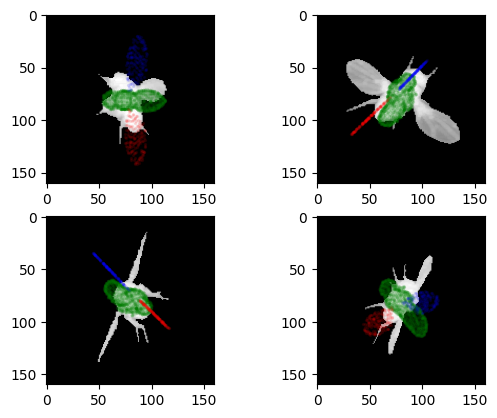

In [ ]:
# bod = nominal_initial_angles[mov_frame]['body_angles']
# bod[0] = 180

import Plotters
body_angles = torch.tensor([-60, -0, 0 ],device='cuda')
# body_angles[2] = body_angles[2]

right_wing_angles = torch.tensor([ 0.95598  , 0.649067 ,  -0.7329946],device='cuda')

# right_wing_angles[1] = 127
right_wing_angles_joint1 = torch.tensor(0.0).cuda()
right_wing_angles_joint2 = torch.tensor(0.0).cuda()
right_wing_twist_joint1 = torch.tensor(-0.0).cuda()
right_wing_twist_joint2 = torch.tensor(-0.0).cuda()

left_wing_angles = torch.tensor([0,0,0,0],device='cuda')
# left_wing_angles[1] = 73-180
left_wing_angles = torch.tensor([-0.668076 , 0.354708 ,   0.6790805],device='cuda')

left_wing_angles_center = torch.tensor([0,0,-0.0],device='cuda')
left_wing_angles_joint1 = torch.tensor(-0.0).cuda()
left_wing_angles_joint2 = torch.tensor(-0.0).cuda()
left_wing_twist_joint1 = torch.tensor(0.0).cuda()
left_wing_twist_joint2 = torch.tensor(0.0).cuda()

thorax_ang=  torch.tensor(-0.0).cuda()

cm_point_lab_t = cm_point_lab 

means3D = model_utils.transform_pose(skin,weights,body_angles,list_joints_pitch_update,joint_list,bones,cm_point_lab_t,right_wing_angles,
                   left_wing_angles,right_wing_angles_joint1,left_wing_angles_joint1,
                   right_wing_twist_joint1,left_wing_twist_joint1,right_wing_angles_joint2,left_wing_angles_joint2,
                   right_wing_twist_joint2,left_wing_twist_joint2)
means3D_ew = torch.tensor(torch.tensor(ew_to_lab.T).cuda().float() @ means3D.T,device='cuda').float().T

body_ew = means3D_ew[:body.ptcloud_skin.shape[0],:]
rw_ew = means3D_ew[body.ptcloud_skin.shape[0]:body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0],:]
lw_ew = means3D_ew[body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0]:body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0] + left_wing.ptcloud_skin.shape[0],:]


body_model = means3D[:body.ptcloud_skin.shape[0],:]
rw_model = means3D[body.ptcloud_skin.shape[0]:body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0],:]
lw_model = means3D[body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0]:body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0] + left_wing.ptcloud_skin.shape[0],:]


ax = Plotters.plot_projections(body_ew[::1,:].cpu(),frames_per_cam, color = 'green', alpha = 0.1)
ax = Plotters.plot_projections(rw_ew[::10,:].cpu(),frames_per_cam, color = 'red', ax = ax, alpha = 0.1)
ax = Plotters.plot_projections(lw_ew[::10,:].cpu(),frames_per_cam, color = 'blue', ax = ax, alpha = 0.1)

# Plotters.plot_images([-58.668076 , 180-22.354708 ,   5.6790805], ax = None)
fig = go.Figure()
Plotter.plot_skeleton(bones,fig,{},line_dict = {'width' : 10}, name = ['neck_head','wing','neck_thorax','thorax_abdomen','right_wing','right_wing_center1','right_wing_center2','left_wing','left_wing_center1','left_wing_center1'])
Plotter.plot_skin(fig,body_model.cpu(),'skin',skip_skin_points = 1,color = 'lime',size = 3)
Plotter.plot_skin(fig,rw_model.cpu(),'skin',skip_skin_points = 1,color = 'firebrick',size = 3)
Plotter.plot_skin(fig,lw_model.cpu(),'skin',skip_skin_points = 1,color = 'slateblue',size = 3)



In [91]:
body_ew

tensor([[ 0.0051,  0.0085, -0.0065],
        [ 0.0051,  0.0085, -0.0066],
        [ 0.0050,  0.0086, -0.0066],
        ...,
        [ 0.0039,  0.0062, -0.0076],
        [ 0.0040,  0.0062, -0.0077],
        [ 0.0039,  0.0062, -0.0076]], device='cuda:0')

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

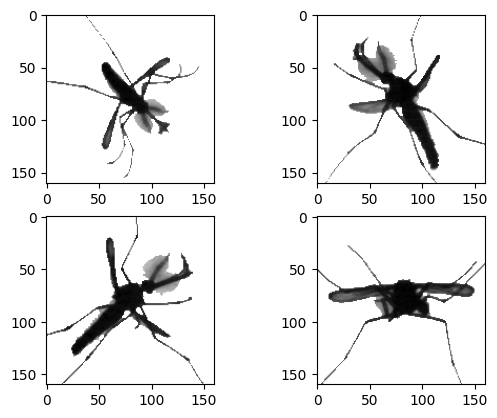

In [2]:

import Plotter
import Plotters
frame = 200
frames_per_cam = [Frame(image_path,frame,cam_num,frames_dict = data_dict) for cam_num in range(4)]
Plotters.plot_images(frames_per_cam, ax = None)

C:\Users\Roni\AppData\Local\Temp\ipykernel_144\2843743913.py:200: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



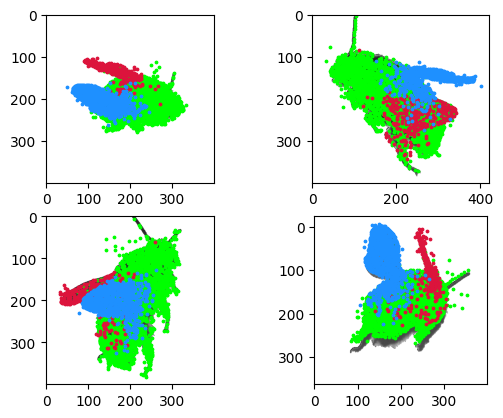

In [4]:
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)



from Camera import Camera
from Frame import Frame
import Plotters
import Utils as Utils



import numpy as np
import numpy as np
import argparse
from io import BytesIO
import matplotlib.pyplot as plt
import Plotters
import plotly
import plotly.graph_objects as go
import scipy.io
from plyfile import PlyData

import pickle
import numpy as np
import math

import matplotlib.pyplot as plt
import Utils


path = 'C:/Users/Roni/Documents/gs_input/frames_model.pkl'
dict_path  = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov30_2024_11_12_darkan/frames_model.pkl'

# dict_path = 'D:/Documents/data_for_gs/fly_gray/dict/frames_model.pkl'
image_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov30_2024_11_12_darkan/'


model_name = 'opacity_3dgs_noaa'#'model_8_4_25_deform_rec'
# model_name = 'model_8_4_25_deform_rec'#'model_8_4_25_deform_rec'
model_name = 'model_run'#'model_8_4_25_deform_rec'

file_name = 'model_rotation_lr_center0.07_densify_grad_threshold_0.00035_long_wing_thin_y2_weight' # model and deform, xyz together
file_name = 'model_rotation_lr_center0.07_densify_grad_threshold_0.00035_re' # model and deform, xyz together
file_name = 'densify_until_2000_densify_from_500_iterations_20000_default_opacity_intvl_50_opacity_lr0.1'
file_name = 'model_rotation_lr_center0.07_densify_grad_threshold_0.00035_rotation'
# file_name = 'model_rotation_lr_center0.07_densify_grad_threshold_0.00035_rec'

file_name = 'model_rotation_lr_center0.07_densify_grad_threshold_0.0005'

file_name = 'scaling_later0.01_densify_grad_threshold0.00035_rotation'
path_output = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_output'



dict_path  = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov7_2024_11_12_darkan/frames_model.pkl'
image_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov7_2024_11_12_darkan/'
file_name = 'try_bee11'
path_output = 'D:/Documents/gaussian_model_output/'
model_name = 'bee'#'model_8_4_25_deform_rec'



path_angles = f'{path_output}/{model_name}/{file_name}_angles.pkl'


# download model_run localy


iteration = 10000

frame0 = 1010
frame_end = 1011
weight_flag = False

with open(dict_path,'rb') as f:
    frames = pickle.load(f)

vertices_list = []
image_list = []
weights_list = []
gaussian_list = []
idx_parts = []
xyz_rotated = []
for frame in range(frame0,frame_end):
    ew_to_lab = frames[frame][1][list(frames[frame][1].keys())[0]]['ew_to_lab']
    input_dir = f'{path_output}/{model_name}/{frame}/{file_name}/'
    input_file = f'{path_output}/{model_name}/{frame}/{file_name}/point_cloud/iteration_{iteration}/point_cloud.ply'
    vertices = PlyData.read(input_file)["vertex"]
    xyz = np.column_stack((vertices['x'],vertices['y'],vertices['z']))
    vertices_list.append(xyz)
    xyz_rotated.append((ew_to_lab @ xyz.T).T)

    frames_per_cam = [Frame(image_path,frame,cam, frames_dict = frames)  for cam in range(4)]
    image_list.append(frames_per_cam)
    if os.path.exists(f'{input_dir}/weights.pkl'):
        with open(f'{input_dir}/weights.pkl', 'rb') as handle:
            output_angles_weights = pickle.load(handle)
            weights_list.append(output_angles_weights)
            weight_flag = True
            idx_parts.append([np.sum(output_angles_weights[iteration][:,idx:idx + 3],axis = 1) == 1 for idx in range(0,9,3)])
            color_list = ['lime','crimson','dodgerblue']
            color_list_2d = ['lime','crimson','dodgerblue']


frame = 1010

# input_file = f'D:/Documents/gaussian_model_output/mdoel_le_deform/{frame}/{file_name}/point_cloud/iteration_900/point_cloud.ply'


frame_data = image_list[frame - frame0] 

ew_to_lab = frames[frame][1][list(frames[frame][1].keys())[0]]['ew_to_lab']
xyz = vertices_list[frame - frame0]
# xyz_rotated = (ew_to_lab @ xyz.T).T



fig = go.Figure()

for idx,color in zip(range(len(idx_parts[frame - frame0])),color_list):   
    Plotters.scatter3d(fig,xyz_rotated[frame - frame0][idx_parts[frame - frame0][idx],:],color,3,'body',show_colorbar = False)

fig.show()

ax = None
for idx,color in zip(range(len(idx_parts[frame - frame0])),color_list_2d): 
    ax = Plotters.plot_projections(xyz[idx_parts[frame - frame0][idx],:],frame_data,color = color,ax = ax)


import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)

import torch
import model_utils
import Plotter
from Frame import Frame
import pickle 
import numpy as np
import Utils
import plotly.graph_objects as go
import plotly.io as pio
from plyfile import PlyData
path_to_mesh = 'D:/Documents/model_gaussian_splatting/model/mesh'    
image_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov30_2024_11_12_darkan/'
image_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov7_2024_11_12_darkan/'

dict_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov30_2024_11_12_darkan/frames_model.pkl'
dict_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov7_2024_11_12_darkan/frames_model.pkl'


# dict_path = 'D:/Documents/data_for_gs/fly_gray/dict/frames_model.pkl'

with open(dict_path, 'rb') as file:
    data_dict = pickle.load(file)



root,body,right_wing,left_wing,list_joints_pitch_update = model_utils.initilize_skeleton_and_skin(path_to_mesh,skeleton_scale=1/200)
joint_list,skin,weights,bones = model_utils.build_skeleton(root,body,right_wing,left_wing)


import Plotter
import Plotters
import plotly.graph_objects as go
import plotly.io as pio
from plyfile import PlyData


root,body,right_wing,left_wing,list_joints_pitch_update = model_utils.initilize_skeleton_and_skin(path_to_mesh,skeleton_scale=1/200)
joint_list,skin,weights,bones = model_utils.build_skeleton(root,body,right_wing,left_wing)


frame = 1020
frames_per_cam = [Frame(image_path,frame,cam_num,frames_dict = data_dict) for cam_num in range(4)]
camera_pixel = np.vstack([frame.camera_center_to_pixel_ray(([frame.cm[0],frame.cm[1]])) for frame in  frames_per_cam])
camera_center = np.vstack([frame.X0.T for frame in  frames_per_cam])
cm_point = Utils.triangulate_least_square(camera_center,camera_pixel)
ew_to_lab = list(data_dict[frame][1].values())[0]['ew_to_lab']
cm_point_lab = torch.tensor(ew_to_lab @ cm_point,device='cuda').float()


pio.renderers.default='browser'
body_angles = torch.tensor([-110.0,  -45.0, 30],device='cuda')
right_wing_angles = torch.tensor([-110,-60,-10.],device='cuda')
right_wing_angles_center1 = torch.tensor([0,0,0.0],device='cuda')
right_wing_angles_center2 = torch.tensor([0,0,0.0],device='cuda')

left_wing_angles = torch.tensor([80,-90,-0.0],device='cuda')
left_wing_angles_center = torch.tensor([0,0,-1.0],device='cuda')

cm_point_lab_t = cm_point_lab + torch.tensor([0.0001,-0.0025,-0.000] ,device = 'cuda')
means3D = model_utils.transform_pose(skin,weights,body_angles,
                            list_joints_pitch_update,joint_list,bones,cm_point_lab_t,
                            right_wing_angles,left_wing_angles,right_wing_angles_center1,left_wing_angles_center,right_wing_angles_center2)
means3D_ew = torch.tensor(torch.tensor(ew_to_lab.T).cuda().float() @ means3D.T,device='cuda').float().T

idx_body = np.sum(weights.cpu().numpy()[:, :3], axis=1) == 1
idx_rw   = np.sum(weights.cpu().numpy()[:, 3:6], axis=1) == 1
idx_lw   = np.sum(weights.cpu().numpy()[:, 6:], axis=1) == 1

# Plotters.scatter3d(fig,vertices_lab,'red',3,'vol',show_colorbar = False)
# fig.show()

Plotter.plot_skeleton(bones,fig,{},{}, name = ['neck_head','neck_thorax','thorax_abdomen','right_wing','right_wing_center1','right_wing_center2','left_wing','left_wing_center1','left_wing_center1'])
Plotter.plot_skin(fig,means3D.cpu()[idx_body,:],'skin',skip_skin_points = 1,color = 'lime',size = 3)
Plotter.plot_skin(fig,means3D.cpu()[idx_rw,:],'skin',skip_skin_points = 1,color = 'pink',size = 3)
Plotter.plot_skin(fig,means3D.cpu()[idx_lw,:],'skin',skip_skin_points = 1,color = 'cyan',size = 3)
fig.show()


path_to_save = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_output/model_twist.html'
fig.write_html(path_to_save)

# frames_per_cam = [Frame(image_path,frame,cam_num, frames_dict = frames) for cam_num in range(4)]


In [ ]:
path_grads = 'D:/Documents/gaussian_model_output/model_lowres'

with open(f'{path_grads}/xyz_grad.pkl', 'rb') as file:
    xyz_grad = pickle.load(file)

with open(f'{path_grads}/viewspace_point_tensor.pkl', 'rb') as file:
    viewspace_point_tensor = pickle.load(file)


with open(f'{path_grads}/xyz_gradient_accum.pkl', 'rb') as file:
    xyz_gradient_accum = pickle.load(file)
    

C:\Users\Roni\AppData\Local\Temp\ipykernel_144\3824364384.py:15: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

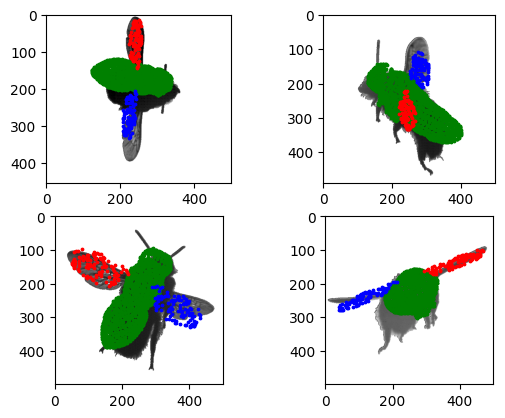

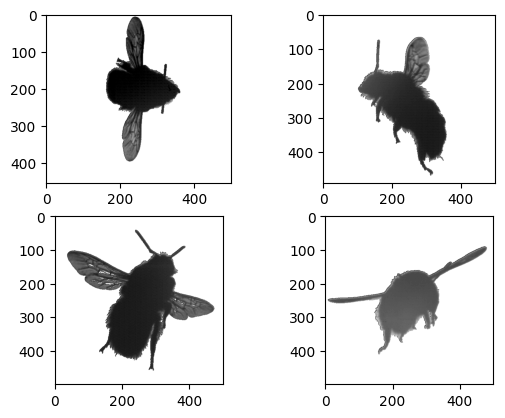

In [39]:
import Plotters

body_angles = torch.tensor([-110.0,  -30.0, -6],device='cuda')
right_wing_angles = torch.tensor([-0,-60,-0.],device='cuda')
right_wing_angles_center1 = torch.tensor([0,0,0.0],device='cuda')
right_wing_angles_center2 = torch.tensor([0,0,0.0],device='cuda')

left_wing_angles = torch.tensor([-0,-60,-0.0],device='cuda')
left_wing_angles_center = torch.tensor([0,0,-1.0],device='cuda')

cm_point_lab_t = cm_point_lab + torch.tensor([-0.001,-0.001,0.001] ,device = 'cuda')
means3D = model_utils.transform_pose(skin,weights,body_angles,
                            list_joints_pitch_update,joint_list,bones,cm_point_lab_t,
                            right_wing_angles,left_wing_angles,right_wing_angles_center1,left_wing_angles_center,right_wing_angles_center2)
means3D_ew = torch.tensor(torch.tensor(ew_to_lab.T).cuda().float() @ means3D.T,device='cuda').float().T

body_ew = means3D_ew[:body.ptcloud_skin.shape[0],:]
rw_ew = means3D_ew[body.ptcloud_skin.shape[0]:body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0],:]
lw_ew = means3D_ew[body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0]:body.ptcloud_skin.shape[0]+right_wing.ptcloud_skin.shape[0] + left_wing.ptcloud_skin.shape[0],:]

ax = Plotters.plot_projections(body_ew[::1,:].cpu(),frames_per_cam, color = 'green')
ax = Plotters.plot_projections(rw_ew[::10,:].cpu(),frames_per_cam, color = 'red', ax = ax)
ax = Plotters.plot_projections(lw_ew[::10,:].cpu(),frames_per_cam, color = 'blue', ax = ax)

Plotters.plot_images(frames_per_cam, ax = None)






In [3]:
import Plotter
import plotly.graph_objects as go
import plotly.io as pio
from plyfile import PlyData

pio.renderers.default='browser'


# file_name= 'location_try_opacity500_scale13_opacitylr_02_gradth05_sclng005_lowresmesh'
# input_file = f'D:/Documents/gaussian_model_output/model_lowres/{frame}/{file_name}/point_cloud/iteration_700/point_cloud.ply'


# image_size = frames_per
# _cam[0].image_size


# vertices = PlyData.read(input_file)["vertex"]
# vertices = np.column_stack((vertices['x'],vertices['y'],vertices['z']))

# vertices_lab = (ew_to_lab @ vertices.T).T


fig = go.Figure()

# Plotters.scatter3d(fig,vertices_lab,'red',3,'vol',show_colorbar = False)
# fig.show()

Plotter.plot_skeleton(bones,fig,{},{}, name = ['neck_head','neck_thorax','thorax_abdomen','right_wing','right_wing_center1','right_wing_center2','left_wing','left_wing_center'])
Plotter.plot_skin(fig,means3D.cpu(),'skin',skip_skin_points = 1,color = 'green',size = 3)
fig.show()
path_to_save = 'D:/Documents/model_gaussian_splatting/plots/model.html'
fig.write_html(path_to_save)


In [ ]:
color = weights/255*torch.tensor([0,0,0,255,255]).cuda()
color = color.sum(1).repeat(3,1).T
fig = go.Figure()
Plotters.scatter3d(fig,means3D.cpu(),color[:,0].cpu().numpy(),3,'vol',show_colorbar = False)
fig.show()


NameError: name 'go' is not defined

In [ ]:
points = bones[3].global_transformation[:,0] + bones[3].global_transformation[:,-1]
torch.matmul(points[0:3],bones[3].bone.direction)

# bones[3].bone.direction

tensor(0.4704, device='cuda:0')

In [205]:
color = weights/255*torch.tensor([0,0,0,150,150]).cuda()
color = color.sum(1).repeat(3,1).T
data_dict[1524][1][496]['ew_to_lab']
bones[3].bone.bone_points


xax = bones[3].global_transformation[:-1,0]
yax = bones[3].global_transformation[:-1,1]
zax = bones[3].global_transformation[:-1,2]


rot_mats = [frames_per_cam[0].rotation_matrix_from_vectors(grad.cpu().detach().numpy(), zax.cpu().detach().numpy()) for grad in grads_lab]


def angles_body(dcm):
    """calculate the yaw, pitch and roll angles that correspond to each rotation matrix in BODY AXES
    ! if you define new rotation order/ axes, the calculation will be different

    Args:
        dcm (np.array): rotation matrix in camera axes

    Returns:
        yaw_z,pitch_y,roll_x (float): angles of rotation
    """

    yaw_z = np.arctan2(dcm[1,0],dcm[0,0])*180/np.pi
    pitch_y = np.arcsin(dcm[2,0])*180/np.pi
    roll_x = np.arctan2(dcm[2,1],dcm[2,2])*180/np.pi
    return yaw_z,pitch_y,roll_x


angles = [angles_body(rot_mat) for rot_mat in rot_mats]

import matplotlib.pyplot as plt
# plt.plot(torch.vstack((psi,theta)).T.cpu().detach())

# plt.plot(theta.cpu().detach(),'*')

rot_mat = frames_per_cam[0].rotation_matrix_from_vectors(mean_grad.cpu().detach().numpy(), zax.cpu().detach().numpy())

print(angles_body(rot_mat))

print(yaw_z,pitch_y,roll_x)


(38.29924729504989, 16.985854768695017, -51.50938296150371)
-2.843383600270869 19.290596534738352 -29.507928134230454


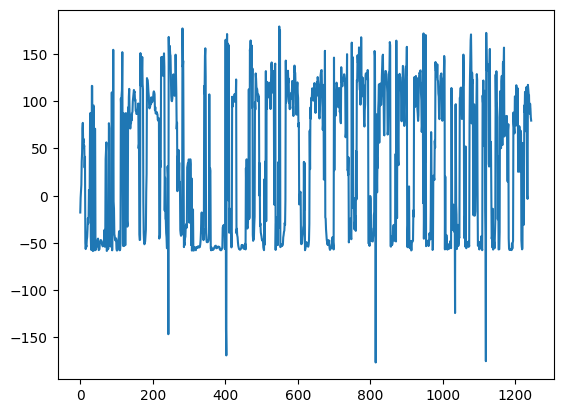

In [213]:
wakk = np.vstack(angles)

plt.plot(wakk[:,0])

In [ ]:
import Plotter
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='browser'

frames_per_cam[0]

right_wing = weights[:,3] == 1
xyz_gradient_accum_right_wing = xyz_gradient_accum[right_wing]
grad_th = (xyz_gradient_accum_right_wing > 0.0005).flatten()
wing_means = means3D[right_wing,:]
grads = xyz_grad[right_wing,:]

mean_wing = wing_means[grad_th,:].mean(0)


ew_to_lab = data_dict[1524][1][496]['ew_to_lab']

grads_lab = torch.matmul(torch.tensor(ew_to_lab).cuda().float(), grads[grad_th,:].T).T
mean_grad =  grads_lab.mean(0)


fig = go.Figure()
Plotter.plot_skeleton(bones,fig,{},{}, name = ['neck_head','neck_thorax','thorax_abdomen','right_wing','left_wing'])
Plotter.plot_skin(fig,means3D.cpu(),'skin',skip_skin_points = 1,color = color[::1,:].cpu().numpy(),size = 3,colorscale = 'gray')

Plotter.plot_cones(fig, wing_means[grad_th,:].cpu(),grads_lab.cpu(), skip = 1,sizeref = 30)
Plotter.plot_cones(fig, mean_wing[:,None].T.cpu(),mean_grad[:,None].T.cpu(), skip = 1,sizeref = 0.0005)


# Plotter.plot_skin(fig,left_wing.ptcloud_skin.cpu(),'skin',skip_skin_points = 10,color = 'blue',size = 3)
# Plotter.plot_skin(fig,body.ptcloud_skin.cpu(),'skin',skip_skin_points = 10,color = 'green',size = 3)
fig.show()



d:\Documents\model_gaussian_splatting\Plotters.py:69: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



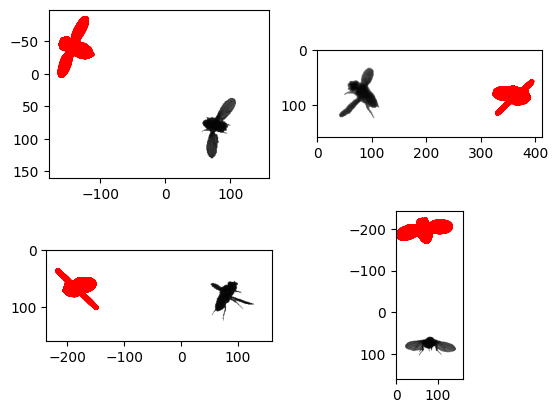

In [18]:

import numpy as np
body_angles = torch.tensor([20,-45,30],device='cuda')
body_location = torch.tensor([1,2,0],device='cuda')/1000
right_wing_angles = torch.tensor([60,45,5],device='cuda')
left_wing_angles = torch.tensor([-60,45,-5],device='cuda')
weights = weights.cuda()

means3D = Utils.transform_pose(skin,weights,body_angles,
                            list_joints_pitch_update,joint_list,bones,body_location,
                            right_wing_angles,left_wing_angles)

fig = go.Figure()
Plotter.plot_skeleton(bones,fig,{},{}, name = ['neck_head','neck_thorax','thorax_abdomen','right_wing','right_wing','left_wing'])
Plotter.plot_skin(fig,means3D.cpu(),'skin',skip_skin_points = 10,color = 'red',size = 3)
fig.show()

AttributeError: module 'Utils' has no attribute 'transform_pose'